# **Multi-Class Logistic Regression Model with Pytorch on MNIST Dataset**

Modelling a multi-class logistic regression model with pytorch to predict the digit(0-9) in an image of 28X28 pixels.

Libraries we will use:
* Numpy
* Matplotlib
* Torch
* Torchvision
* tqdm

In [1]:
# importing liberaries
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# importing builtin datasets from torchvision and transforms to transform dataset into tensor.
from torchvision import datasets, transforms


We will download MNIST dataset present in torchvision.datasets

In [2]:
# downloading MNIST dataset's train and train data.
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

0it [00:00, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw


0it [00:00, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw


0it [00:00, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw


0it [00:00, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw
Processing...
Done!


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729141890/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Checking number of test and training examples

In [3]:
print("Number of MNIST training examples: {}".format(len(mnist_train)))
print("Number of MNIST test examples: {}".format(len(mnist_test)))

Number of MNIST training examples: 60000
Number of MNIST test examples: 10000


Let's check one example of training set. It contains both input data and corresponding output(label) in form of tuple. Let's extract features:

In [5]:
# checking one example image.
image, label = mnist_train[3]

print("Default Image shape: {}".format(image.shape))

Default Image shape: torch.Size([1, 28, 28])


It is a 3-D tensor(same as a matrix). we will need a 2-D matrix for plotting it as an image through matplotlib.

In [6]:
# reshaping the array into 28 X 28 dimensions as it is a image of 28 X 28 pixels and not 1 X 28 X 28 dimensions.
image = image.reshape([28,28])
print("Reshaped Image shape: {}".format(image.shape))

Reshaped Image shape: torch.Size([28, 28])


Label for this image is: 1


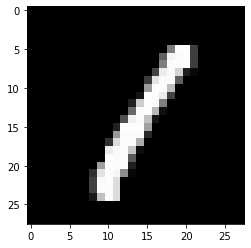

In [8]:
# plotting the image onto graph with grayscale.
plt.imshow(image, cmap="gray")
print("Label for this image is: {}".format(label))

### **Preparing data**

So, let begin modelling.
Let's divide our dataset into batches of batch size of 100.

In [10]:
# loading our MNIST train and test datasets in form of batches with batch_size=100(Simply dividing our data into 100 elements multi-arrays/Tensors).
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [11]:
# choosing one batch to test.
data_train_loader = iter(train_loader)
# extracting input and label of the batch of 100 images.
images, labels = data_train_loader.next()

In [36]:
print("Shape of the minibatch of train loader's images: {}".format(images.shape))
print("Shape of the minibatch of train loader's labels: {}".format(labels.shape))

Shape of the minibatch of train loader's images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of train loader's labels: torch.Size([100])


Reshaping our matrix into 2-D with view in torch module which act just like reshape of numpy.

In [37]:
# reshaping our examples from 2-D to 1-D as we input single dimension array.
x = images.view(-1, 28*28)
print("The shape of input x: {}".format(x.shape))

The shape of input x: torch.Size([100, 784])


Creating parameters of logistic regression model: filter, bias(W, b).

In [38]:
#  creating our model parameters W, b randomly. 784 rows for 784 featuers/pixels of an example/image and 10 colums for 10 classes(0-9).
W = torch.randn(784, 10)/np.sqrt(784)

# Assigning/allowing gradients to these parameters as we will be using stochastic gradient descent on these parameters and will be needing gradient w.r.t these.
W.requires_grad_()
b = torch.zeros(10, requires_grad=True)

Check our input image examples with filter and find correlation betwwen them.

In [39]:
# doing dot product of examples with filters to find amount of correlation between two and adding bias.
y = torch.matmul(x, W) + b

Checking values for first example of correlated matrix.

In [40]:
print(y[0,:])

tensor([ 0.2278, -0.7060, -0.8890,  0.4447,  0.6881, -0.2679, -0.2003, -0.3016,
        -0.2046, -0.4633], grad_fn=<SliceBackward>)


We have both negative and positive values. Normalize it first with the help of exponents such that values of one example sums upto 1. 

In [41]:
# Normalizing or making our correlated values positive by using exponents.
py_eq = torch.exp(y)/torch.sum(torch.exp(y), dim=1, keepdim=True)
print("py[0] from equation: {}".format(py_eq[0]))

py[0] from equation: tensor([0.1325, 0.0521, 0.0434, 0.1646, 0.2100, 0.0807, 0.0864, 0.0780, 0.0860,
        0.0664], grad_fn=<SelectBackward>)


The same can be done with functions in torch.nn.functional. Softmax is used for normalizing values.
\begin{align}
p(y_i) = \text{softmax}(y_i) = \frac{\text{exp}(y_i)}{\sum_j\text{exp}(y_j)}
\end{align}

In [42]:
# Rather then manually writing equation, we can use inbuilt function of torch.nn.functional .
import torch.nn.functional as F

# Using softmax function to normalize our wieghts or correlated values of examples.
py = F.softmax(y, dim=1)
print("py[0] with torch.nn.functional.softmax function: {}".format(py[0]))

py[0] with torch.nn.functional.softmax function: tensor([0.1325, 0.0521, 0.0434, 0.1646, 0.2100, 0.0807, 0.0864, 0.0780, 0.0860,
        0.0664], grad_fn=<SelectBackward>)


### **Optimizing Parameters**

we can optimize paramters with the help of loss function.
\begin{align}
H_{y'}(y)=-\sum_i y'_i \text{log}(y_i)
\end{align}

In [43]:
# calculating loss function for optimizing manually by writing loss function i.e. adding our predicted value(correlated values of true labels).
cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
print("cross entropy from equation: {}".format(cross_entropy_eq))

cross entropy from equation: 2.3860464096069336


In [44]:
# Using inbuilt function of torch to calculate cross entropy.
cross_entropy = F.cross_entropy(y, labels)
print("cross entropy from torch.nn.functional.cross_entropy function: {}".format(cross_entropy))

cross entropy from torch.nn.functional.cross_entropy function: 2.3860464096069336


In [45]:
# optimizing paramteres with step size 0.1 and Stochastic Gradient Descent.
optimizer = torch.optim.SGD([W,b], lr=0.1)

# calculating gradients of allowed parameters w.r.t optimizing condition i.e. loss function.
cross_entropy.backward()

In [46]:
# gradient before optimizing.
b.grad

tensor([ 0.0368, -0.0283,  0.0287,  0.0580,  0.0071, -0.0224,  0.0152, -0.0045,
         0.0196, -0.1101])

In [47]:
# optimzing with step size 0.1
optimizer.step()

# gradient w.r.t b after optimizing
print(b)

tensor([-0.0037,  0.0028, -0.0029, -0.0058, -0.0007,  0.0022, -0.0015,  0.0004,
        -0.0020,  0.0110], requires_grad=True)


Perform the same thing for all batches. Gradients don't update ut accumulate with every optimization step. Zero out gradients before next optimization step.

In [48]:
print("b.grad before zero_grad:{}".format(b.grad))

b.grad before zero_grad:tensor([ 0.0368, -0.0283,  0.0287,  0.0580,  0.0071, -0.0224,  0.0152, -0.0045,
         0.0196, -0.1101])


In [49]:
# Gradients doesn't update but accumulate with every optimizing step. So, have to zero out before updating gradients.
optimizer.zero_grad()
print("b.grad after zero_grad:{}".format(b.grad))

b.grad after zero_grad:tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [50]:
# Filter matrix
print(W)

tensor([[-0.0205, -0.0208, -0.0026,  ...,  0.0065,  0.0401,  0.0079],
        [ 0.0099, -0.0055,  0.0533,  ..., -0.0172,  0.0503, -0.0176],
        [ 0.0616, -0.0146,  0.0508,  ..., -0.0123, -0.0391,  0.0548],
        ...,
        [-0.0204, -0.0393,  0.0241,  ..., -0.0223,  0.0251, -0.0554],
        [ 0.0520, -0.0649, -0.0580,  ..., -0.1042,  0.0471, -0.0078],
        [-0.0044, -0.0013,  0.0030,  ..., -0.0266,  0.0152, -0.0259]],
       requires_grad=True)


Performing optimization for all batches

In [51]:
# Doing the same thing for all test batches.
for images, labels in tqdm(train_loader):
    # zero out the gradients.
    optimizer.zero_grad()

    # preapring data.
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    
    cross_entropy = F.cross_entropy(y, labels)
    cross_entropy.backward()
    optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

In [53]:
#  Models's learned parameters
print("Filter:{}".format(W))
print("Bias:{}".format(b))

Filter:tensor([[-0.0205, -0.0208, -0.0026,  ...,  0.0065,  0.0401,  0.0079],
        [ 0.0099, -0.0055,  0.0533,  ..., -0.0172,  0.0503, -0.0176],
        [ 0.0616, -0.0146,  0.0508,  ..., -0.0123, -0.0391,  0.0548],
        ...,
        [-0.0204, -0.0393,  0.0241,  ..., -0.0223,  0.0251, -0.0554],
        [ 0.0520, -0.0649, -0.0580,  ..., -0.1042,  0.0471, -0.0078],
        [-0.0044, -0.0013,  0.0030,  ..., -0.0266,  0.0152, -0.0259]],
       requires_grad=True)
Bias:tensor([-0.1071,  0.2192, -0.0266, -0.0821,  0.0471,  0.2797, -0.0198,  0.1713,
        -0.4180, -0.0637], requires_grad=True)


Torch.nn module already has all the function that we need for logistic function. We can train our data with the help of those functions too.

In [61]:
lin = torch.nn.Linear(784, 10)
optimizer = torch.optim.SGD(lin.parameters(), lr=0.1)
for images, labels in tqdm(train_loader):
    y = lin(images.view(-1, 784))
    optimizer.zero_grad()
    cross_entropy = F.cross_entropy(y, labels)
    cross_entropy.backward()
    optimizer.step()
print("Filter: {}".format(list(lin.parameters())[0]))
print("Bias: {}".format(list(lin.parameters())[1]))

  0%|          | 0/600 [00:00<?, ?it/s]

Filter: Parameter containing:
tensor([[ 0.0039,  0.0353, -0.0323,  ..., -0.0063,  0.0203,  0.0005],
        [ 0.0222, -0.0278, -0.0286,  ..., -0.0083,  0.0242,  0.0230],
        [ 0.0077, -0.0184,  0.0105,  ...,  0.0214,  0.0021,  0.0239],
        ...,
        [-0.0171,  0.0038,  0.0139,  ..., -0.0159, -0.0249, -0.0238],
        [ 0.0113,  0.0249, -0.0125,  ..., -0.0329,  0.0317,  0.0076],
        [-0.0251, -0.0152,  0.0106,  ..., -0.0117,  0.0320, -0.0152]],
       requires_grad=True)
Bias: Parameter containing:
tensor([-0.1392,  0.2113, -0.0243, -0.0823,  0.0669,  0.2886, -0.0071,  0.1608,
        -0.3964, -0.0416], requires_grad=True)


Note, Both have different learned parameters. That's because initially we randomly created model's filters. It will produce different results every time we run our model.

**TESTING PERFORMANCE**

Test our model with test set. 

In [54]:
# No. of correct values assigned to 0.
correct = 0
total = len(mnist_test)

In [55]:
# Don't have to calculate gradient now. just have to check correct predictions. But as parameters were created with allowd gradient calculation have to cancel that.
with torch.no_grad():
    # iterating on test batches.
    for images, labels in tqdm(test_loader):
        # preparing data and calcuting correlated values.
        x = images.view(-1, 784)
        y = torch.matmul(x, W) + b

        # Our model prediction is the max correlated value of the given ten classes values.
        predictions = torch.argmax(y, dim =1)

        # Checking correct values.
        correct += torch.sum((predictions == labels).float())

  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy: correcttly predicted values/ total values

In [58]:
#  Test Accuracy
print('Test Accuracy: {}'.format(correct/total))
print('Test correct: {} of {}'.format(correct, total))

Test Accuracy: 0.9009000062942505
Test correct: 9009.0 of 10000


Check our filters by plotting them on graphs

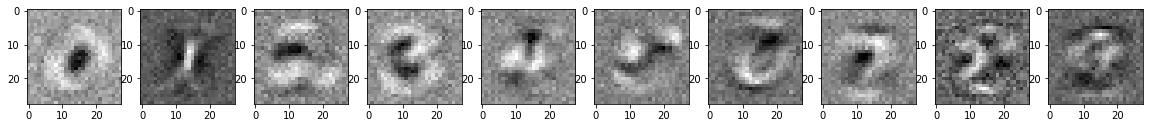

In [59]:
# Plotting learned filters.
fig, ax = plt.subplots(1, 10, figsize=(20,2))
for digit in range(10):
    ax[digit].imshow(W[:,digit].detach().view(28,28), cmap='gray')